In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from keras import models, layers, optimizers, regularizers
from keras.callbacks.callbacks import EarlyStopping
from  matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

Using TensorFlow backend.


/kaggle/input/taxi-fare-pre/__notebook__.ipynb
/kaggle/input/taxi-fare-pre/__results__.html
/kaggle/input/taxi-fare-pre/__output__.json
/kaggle/input/taxi-fare-pre/train_prep10M.feather
/kaggle/input/taxi-fare-pre/test_prep.csv
/kaggle/input/taxi-fare-pre/custom.css
/kaggle/input/taxi-fare-pre/__results___files/__results___37_0.png
/kaggle/input/taxi-fare-pre/__results___files/__results___31_0.png
/kaggle/input/taxi-fare-pre/__results___files/__results___20_0.png
/kaggle/input/taxi-fare-pre/__results___files/__results___16_0.png
/kaggle/input/taxi-fare-pre/__results___files/__results___26_0.png
/kaggle/input/taxi-fare-pre/__results___files/__results___33_0.png
/kaggle/input/taxi-fare-pre/__results___files/__results___28_0.png
/kaggle/input/new-york-city-taxi-fare-prediction/test.csv
/kaggle/input/new-york-city-taxi-fare-prediction/train.csv
/kaggle/input/new-york-city-taxi-fare-prediction/GCP-Coupons-Instructions.rtf
/kaggle/input/new-york-city-taxi-fare-prediction/sample_submission.cs

In [2]:
train_df = pd.read_feather('/kaggle/input/taxi-fare-pre/train_prep10M.feather')
train_df.drop(columns=['index'], axis=1, inplace=True)
train_df.info()

/opt/conda/lib/python3.6/site-packages/pandas/io/feather_format.py:117: FutureWarning: `nthreads` argument is deprecated, pass `use_threads` instead
  return feather.read_feather(path, columns=columns, nthreads=int_use_threads)
/opt/conda/lib/python3.6/site-packages/pyarrow/pandas_compat.py:751: FutureWarning: .labels was deprecated in version 0.24.0. Use .codes instead.
  labels, = index.labels


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9771590 entries, 0 to 9771589
Data columns (total 12 columns):
fare_amount          float32
pickup_longitude     float32
pickup_latitude      float32
dropoff_longitude    float32
dropoff_latitude     float32
passenger_count      uint8
year                 int64
month                int64
day                  int64
hour                 int64
weekday              int64
haversine            float64
dtypes: float32(5), float64(1), int64(5), uint8(1)
memory usage: 643.0 MB


In [3]:
train_df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour,weekday,haversine
0,4.5,-73.844315,40.721317,-73.841614,40.712276,1,2009,6,15,17,0,0.009430
1,16.9,-74.016045,40.711304,-73.979271,40.782005,1,2010,1,5,16,1,0.079615
2,5.7,-73.982735,40.761269,-73.991241,40.750561,2,2011,8,18,0,3,0.013657
3,7.7,-73.987129,40.733143,-73.991570,40.758091,1,2012,4,21,4,5,0.025337
4,5.3,-73.968094,40.768009,-73.956657,40.783764,1,2010,3,9,7,1,0.019454


# Divisão dos dados

In [4]:
train_df, validation_df = train_test_split(train_df, test_size=0.10, random_state=1)
X_train, y_train = train_df.values[:, 1:], train_df.values[:, 0]
X_validation, y_validation = validation_df.values[:, 1:], validation_df.values[:, 0]

# Construção do modelo

In [5]:
model = models.Sequential() 
model.add(layers.Dense(256, activation='relu', input_dim=X_train.shape[1], activity_regularizer=regularizers.l1(0.01))) 
model.add(layers.BatchNormalization()) 
model.add(layers.Dense(128, activation='relu')) 
model.add(layers.BatchNormalization()) 
model.add(layers.Dense(64, activation='relu')) 
model.add(layers.BatchNormalization()) 
model.add(layers.Dense(32, activation='relu')) 
model.add(layers.BatchNormalization()) 
model.add(layers.Dense(16, activation='softmax')) 
model.add(layers.BatchNormalization()) 
model.add(layers.Dense(8, activation='relu')) 
model.add(layers.BatchNormalization()) 
model.add(layers.Dense(1))
adam = optimizers.adam(lr=0.001) 
model.compile(loss='mse', optimizer=adam, metrics=['mse'])

In [6]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               3072      
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)               512       
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
batch_normalization_3 (Batch (None, 64)                256       
_________________________________________________________________
dense_4 (Dense)              (None, 32)               

# Treinamento

In [7]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(x=X_train, y=y_train, batch_size=1024, epochs=50, verbose=1, callbacks=[early_stopping], validation_data=(X_validation, y_validation), shuffle=True)

Train on 8794431 samples, validate on 977159 samples
Epoch 1/50
8794431/8794431 [==============================] - 181s 21us/step - loss: 1124.1583 - mse: 89.9069 - val_loss: 14613.9046 - val_mse: 14613.9014
Epoch 2/50
8794431/8794431 [==============================] - 180s 20us/step - loss: 84.2805 - mse: 84.2805 - val_loss: 67666.4002 - val_mse: 67666.4219
Epoch 4/50
8794431/8794431 [==============================] - 182s 21us/step - loss: 84.2797 - mse: 84.2797 - val_loss: 114.9098 - val_mse: 114.9098
Epoch 5/50
8794431/8794431 [==============================] - 180s 20us/step - loss: 84.2801 - mse: 84.2801 - val_loss: 109.4714 - val_mse: 109.4713
Epoch 6/50
8794431/8794431 [==============================] - 179s 20us/step - loss: 84.2800 - mse: 84.2802 - val_loss: 83.8947 - val_mse: 83.8947
Epoch 21/50
5638144/8794431 [==================>...........] - ETA: 1:02 - loss: 84.3170 - mse: 84.3168

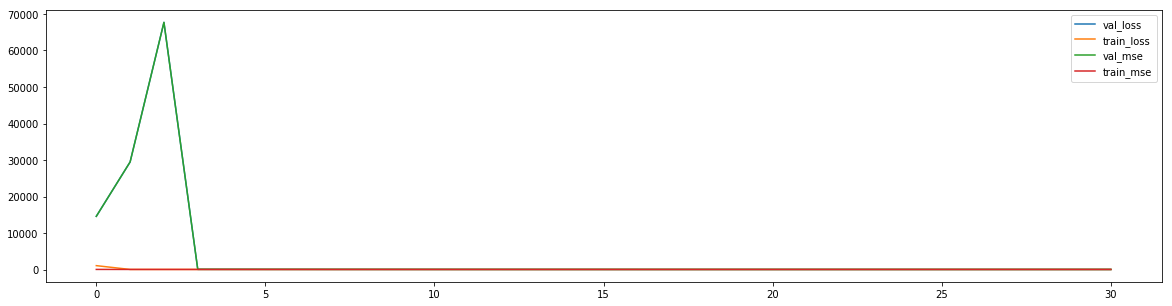

In [8]:
plt.figure(figsize=(20, 5));
plt.plot(history.history['val_loss'], label='val_loss')
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_mse'], label='val_mse')
plt.plot(history.history['mse'], label='train_mse')
plt.legend();

In [9]:
test_df = pd.read_csv('/kaggle/input/taxi-fare-pre/test_prep.csv')
test_key = test_df['key']
test_values = test_df.drop(columns=['key', 'Unnamed: 0']).values
test_df.head()

,Unnamed: 0,key,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour,weekday,haversine
0,0,2015-01-27 13:08:24.0000002,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,27,13,1,0.021542
1,1,2015-01-27 13:08:24.0000003,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,27,13,1,0.023141
2,2,2011-10-08 11:53:44.0000002,-73.982524,40.751260,-73.979654,40.746139,1,2011,10,8,11,5,0.005864
3,3,2012-12-01 21:12:12.0000002,-73.981160,40.767807,-73.990448,40.751635,1,2012,12,1,21,5,0.018634
4,4,2012-12-01 21:12:12.0000003,-73.966046,40.789775,-73.988565,40.744427,1,2012,12,1,21,5,0.050604


In [10]:
pred = model.predict(test_values)
# não cheguei a fazer a validação pois fiquei muito insatisfeito com os resultados da validação